# OpenCV. РОБОТА із ЗОБРАЖЕННЯМИ
## Файл: CV_Image_05_001

### Просторова фільтрація зображень. Нелінійна фільтрація

#### SEE [Imgproc module](https://docs.opencv.org/2.4/doc/tutorials/imgproc/table_of_content_imgproc/table_of_content_imgproc.html)
#### SEE [Image Filtering](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html)
#### SEE [Miscellaneous Image Transformations](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=.threshold#cv2.threshold)

### [Медіанний фільтр](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#medianblur)

In [1]:
## Завантаження пакетів
import numpy as np
from numpy.random import Generator, MT19937
import matplotlib.pyplot as plt # this lets you draw inline pictures in the notebooks
import skimage.io as io
plt.rcParams['font.size'] = 10

In [2]:
import cv2 as cv
print (cv.__version__)

4.10.0


In [3]:
# ВИзначення та друк параметрів зображення
def image_data (image):
    rank     = len(image.shape)
    rows_num = image.shape[0] ## кількість рядків
    clms_num = image.shape[1] ## кількість колонок
    chen_num = 1
    if rank == 3: 
        chen_num = image.shape[2] ## кількість каналів
    print('Опис зображення ')
    print('IMAGE RANK',  rank)
    print('IMAGE SHAPE', image.shape)
    print('DATA Type',   image.dtype)
    return rows_num,clms_num, chen_num

In [4]:
# Convert ONE image from BGR to RGB & out
def image1_view (image, image_name):
    rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(4, 4))
    plt.title(image_name)
    plt.imshow(rgb_image)
    plt.show()
    return 

In [5]:
# Convert TWO image from BGR to RGB & out
def image2_view (image1, image2, image1_name, image2_name):
    rgb_image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
    rgb_image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()
    ax[0].set_title(image1_name)
    ax[0].imshow(rgb_image1)
    ax[1].set_title(image2_name)
    ax[1].imshow(rgb_image2)
    plt.show()
    return


#### Мадіанний фільтр

Розмиває зображення за допомогою медіанного фільтра.

cv.medianBlur(src, ksize[, dst]) → dst

Параметри:

- **src** - вхідне 1-, 3- або 4-канальнt зображення; коли ksize дорівнює 3 або 5, глибина зображення має бути CV_8U, CV_16U або CV_32F, для великих розмірів діафрагми вона може бути лише CV_8U.
- **dst** - вихідне зображення того ж самого розміру та кількості каналів як і src.
- **ksize** – лінійний розмір апертури; воно повинно бути непарним і більше 1, наприклад: 3, 5, 7 ...

Функція згладжує зображення за допомогою медіанного фільтра з діафрагмою $\texttt{ksize} \times \texttt{ksize}$ . Кожен канал багатоканального зображення обробляється незалежно. 



#### Приклад використання медіаннго фільтру

#### Читання зображення з файлу

In [6]:
## Завантаження файлу зображення
path = './IMAGES/'
filename = 'Lenna.png' 
test_img_ = cv.imread(path + filename, 0)
## Визначення стркутури та розміру зображення
image_data (test_img_)

Опис зображення 
IMAGE RANK 2
IMAGE SHAPE (512, 512)
DATA Type uint8


(512, 512, 1)

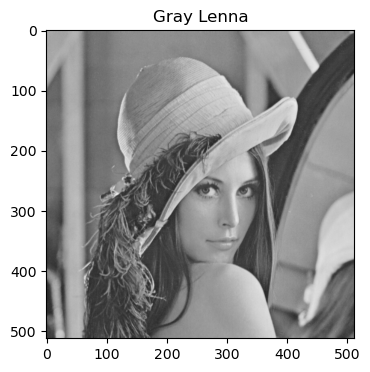

In [7]:
# Display whith Matplotlib
image1_view (test_img_, 'Gray Lenna')

#### Додаємо заваду (СІЛЬ / ПЕРЕЦЬ)

In [8]:
rg = Generator(MT19937(12345))
impuls_num = 1024 # кількість завад
test_img_noise = test_img_.copy()
for i in range(1,impuls_num):
    pixx = np.int32(rg.random()*test_img_.shape[0])
    pixy = np.int32(rg.random()**test_img_.shape[1])
    pixx = np.int32(rg.random()*test_img_.shape[0])
    pixy = np.int32(rg.random()*test_img_.shape[1])
    test_img_noise[pixx,pixy] = 255   
    
image_data (test_img_noise)

Опис зображення 
IMAGE RANK 2
IMAGE SHAPE (512, 512)
DATA Type uint8


(512, 512, 1)

In [9]:
while True:
    cv.imshow('Original IMAGE', test_img_noise)
    if cv.waitKey(1) == ord('q'):
        break
cv.destroyAllWindows()

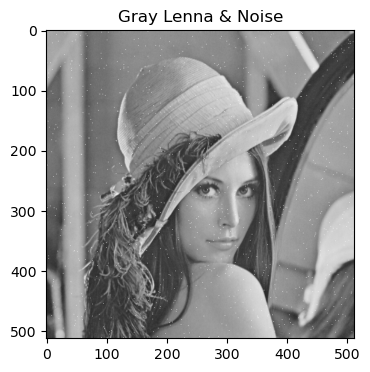

In [10]:
# Display Gray with noise
image1_view (test_img_noise, 'Gray Lenna & Noise')

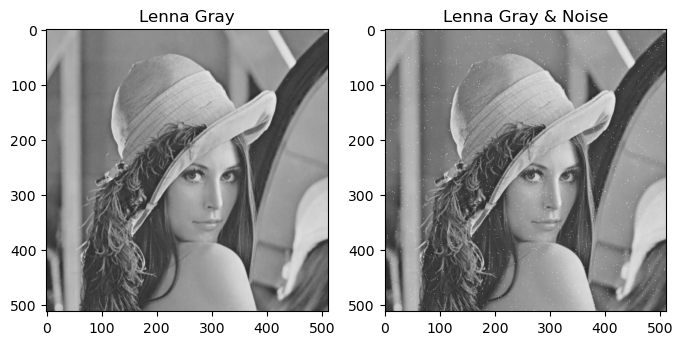

In [11]:
# Display Lenna_Gray & Lenna Gray with noise
image2_view (test_img_, test_img_noise, 'Lenna Gray', 'Lenna Gray & Noise')

#### Використовуємо медіанний фільтр

In [12]:
ksize = 3
median_image = cv.medianBlur(test_img_noise, ksize)
image_data (median_image)

Опис зображення 
IMAGE RANK 2
IMAGE SHAPE (512, 512)
DATA Type uint8


(512, 512, 1)

In [13]:
while True:
    cv.imshow('MEDIAN IMAGE', median_image)
    if cv.waitKey(1) == ord('q'):
        break
cv.destroyAllWindows()

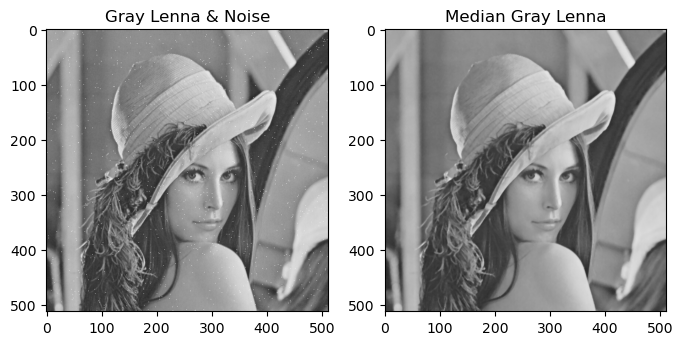

In [14]:
# # Display Lenna Gray with noise & Lenna Gray after median filter
image2_view (test_img_noise, median_image, 'Gray Lenna & Noise', 'Median Gray Lenna')

In [15]:
rg = Generator(MT19937(12345))
impuls_num = 1024 # кількість завад
test_img_noise = test_img_.copy()
rows_num = test_img_.shape[0]
clms_num = test_img_.shape[1]
for i in range(1,impuls_num):
    pixx = np.int32(rg.random()*((rows_num-2)+1))
    pixy = np.int32(rg.random()*((clms_num-2)+1))
    test_img_noise[pixx,pixy] = 255   
    test_img_noise[pixx+1,pixy] = 255   
    test_img_noise[pixx-1,pixy] = 255 
    test_img_noise[pixx,pixy+1] = 255   
    test_img_noise[pixx,pixy-1] = 255   

image_data (test_img_noise)

Опис зображення 
IMAGE RANK 2
IMAGE SHAPE (512, 512)
DATA Type uint8


(512, 512, 1)

In [16]:
while True:
    cv.imshow('Original IMAGE', test_img_noise)
    if cv.waitKey(1) == ord('q'):
        break
cv.destroyAllWindows()

####  Порівняння результатів медіанної фільтрації з ріним розміром ядра

In [17]:
median_image_3 = cv.medianBlur(test_img_noise, 3)
median_image_5 = cv.medianBlur(test_img_noise, 5)
median_image_7 = cv.medianBlur(test_img_noise, 7)
while True:
    cv.imshow('MEDIAN IMAGE (3)', median_image_3)
    if cv.waitKey(1) == ord('q'):
        break
while True:    
    cv.imshow('MEDIAN IMAGE (5)', median_image_5)
    if cv.waitKey(1) == ord('q'):
        break
while True:
    cv.imshow('MEDIAN IMAGE  (7)', median_image_7)
    if cv.waitKey(1) == ord('q'):
        break
cv.destroyAllWindows()

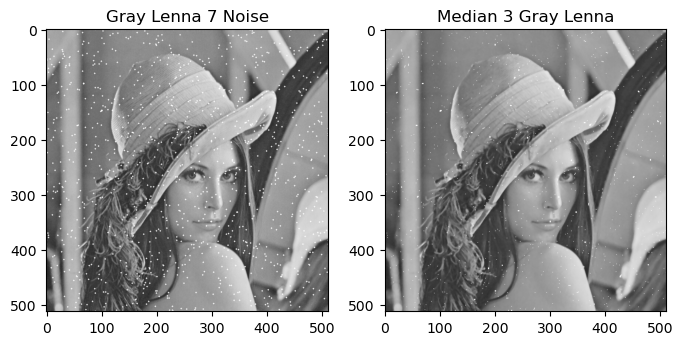

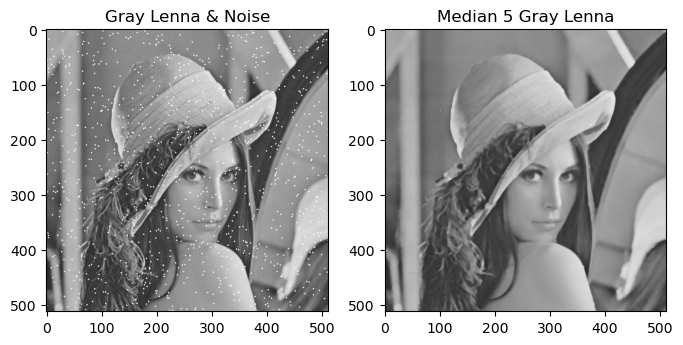

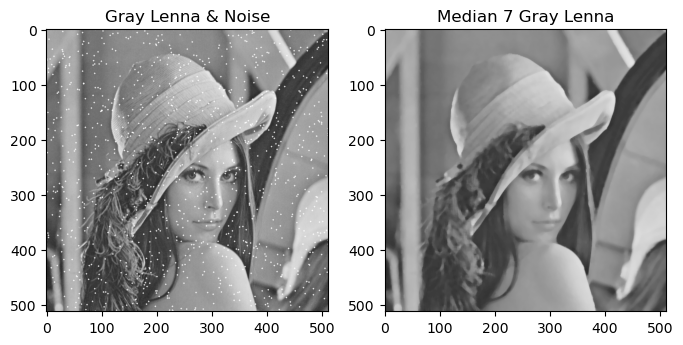

In [21]:
# Display Lenna Gray with noise & Lenna Gr5y after median filter ksoze = 3
image2_view (test_img_noise, median_image_3, 'Gray Lenna 7 Noise', 'Median 3 Gray Lenna')
image2_view (test_img_noise, median_image_5, 'Gray Lenna & Noise', 'Median 5 Gray Lenna')
image2_view (test_img_noise, median_image_7, 'Gray Lenna & Noise', 'Median 7 Gray Lenna')